In [18]:
from datetime import date, datetime

import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [9]:
ticker = yf.Ticker("IBM")
exp_dates = ticker.options

In [5]:
data = ticker.history(period="5y")
price = data.iloc[-1]['Close']

In [39]:
temp_data = pd.DataFrame()
callData = pd.DataFrame()

In [40]:
for time in exp_dates:
    chain = ticker.option_chain(time)
    chain_df = chain.calls
    date_time_obj = datetime.strptime(time, "%Y-%m-%d")
    Td = date_time_obj - datetime.today()

    for row in range(len(chain_df.index)):
        values_to_add = {"Matdays": Td.days, "Maturity": date_time_obj}
        values_to_add_call = {
            "Strike": chain_df["strike"].loc[row],
            "Implied Vol": chain_df["impliedVolatility"].loc[row],
            "Price": chain_df["lastPrice"].loc[row],
        }
        row_to_add = pd.Series(values_to_add)
        row_to_add_call = pd.Series(values_to_add_call)
        temp_data = temp_data.append(row_to_add, ignore_index=True)
        callData = callData.append(row_to_add_call, ignore_index=True)

In [41]:
callData = pd.concat([callData, temp_data], axis=1)
callData.head()

,Strike,Implied Vol,Price,Matdays,Maturity
0,90.0,1.484378,38.80,2,2023-06-09
1,105.0,0.945313,27.80,2,2023-06-09
2,112.0,0.765627,16.80,2,2023-06-09
3,114.0,0.644535,18.92,2,2023-06-09
4,115.0,0.523442,9.90,2,2023-06-09


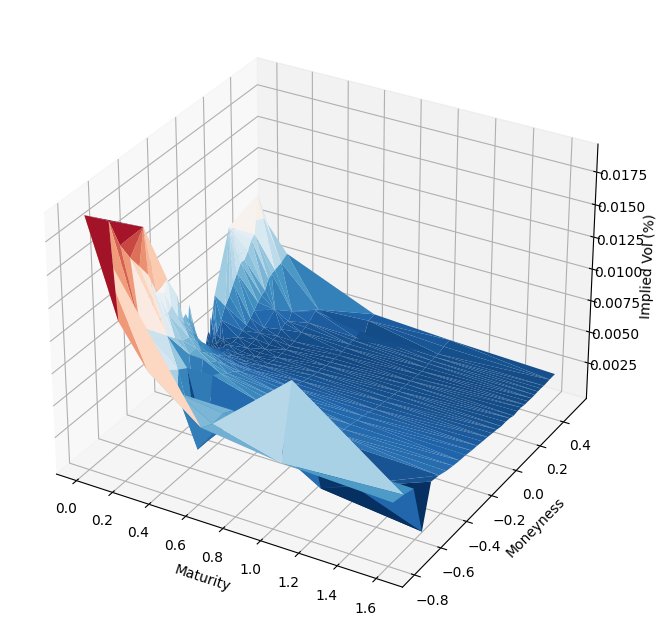

In [42]:
callData["ImpliedVol"] = callData["Implied Vol"].astype(float)

callData = callData[callData["ImpliedVol"] < 90]
callData = callData[callData["ImpliedVol"] > 0]

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection="3d")
surf = ax.plot_trisurf(
    callData["Matdays"] / 365,
    np.log(callData["Strike"] / price), # moneyness is defined as log(K/S)
    callData["ImpliedVol"] / 100,
    cmap=plt.cm.RdBu_r,
    linewidth=0,
)

# set axis labels
ax.set_xlabel("Maturity")
ax.set_ylabel("Moneyness")
ax.set_zlabel("Implied Vol (%)")

plt.show()